In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as mod
import seaborn as sns

from sklearn import datasets as dat
from sklearn import tree
from sklearn import metrics as met 
from sklearn import linear_model as lin
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import ensemble as ens
from tensorflow.keras.datasets import mnist



In [18]:
data = dat.fetch_openml("mnist_784")
#(X_train,y_train),(X_test,y_test) = mnist.load_data()  You can get the data also in this way.
X = data.data
y = data.target

11490434/11490434 [==============================] - 5s 0us/step


In [20]:
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,test_size = 0.15 , random_state = 42)

<AxesSubplot:>

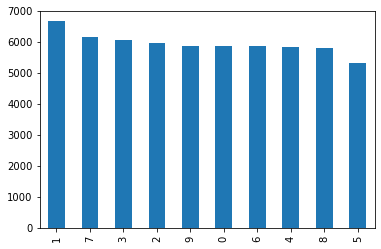

In [23]:
y_train.value_counts().plot(kind = "bar") # is there an imbalance in the target ? 

In [34]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
base_accuracy = pd.Series(y_train_5).value_counts().max() / pd.Series(y_train_5).value_counts().sum()
print(base_accuracy)

0.9102016806722689


In [38]:
tree_clf = tree.DecisionTreeClassifier(random_state = 42)

In [39]:
mod.cross_val_score(tree_clf,X_train,y_train_5,cv=3,scoring = "accuracy").mean()


0.9730588266212651

In [40]:
y_pred = mod.cross_val_predict(tree_clf,X_train,y_train_5,cv=3)

In [44]:
mat = met.confusion_matrix(y_train_5,y_pred)

<AxesSubplot:>

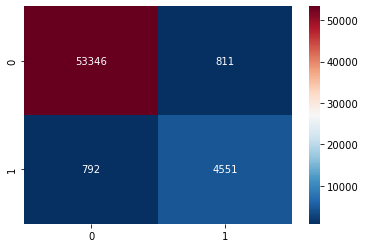

In [45]:
sns.heatmap(mat,cmap = "RdBu_r",annot = True, fmt = "d")

In [46]:
met.accuracy_score(y_train_5,y_pred)

0.9730588235294118

In [48]:
print("Accuracy score:", met.accuracy_score(y_train_5,y_pred))
print("Precision score:",met.precision_score(y_train_5,y_pred)) 
print("Recall score:",met.recall_score(y_train_5,y_pred))
print("F1 score:",met.f1_score(y_train_5,y_pred))



Accuracy score: 0.9730588235294118
Precision score: 0.8487504662439388
Recall score: 0.8517686692869174
F1 score: 0.8502568893040635


In [49]:
print(met.classification_report(y_train_5,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     54157
        True       0.85      0.85      0.85      5343

    accuracy                           0.97     59500
   macro avg       0.92      0.92      0.92     59500
weighted avg       0.97      0.97      0.97     59500



In [50]:
# Pipeline for training SGD Classifier. Since it uses Gradient Descent algorithm inside, scaling is important factor.

pipe_sgd = pip.Pipeline([
     ("scaler",pre.StandardScaler()),
     ("sgd_clf", lin.SGDClassifier(random_state = 42))
     ])

y_pred2 = mod.cross_val_predict(pipe_sgd,X_train,y_train_5,cv=3)

In [52]:
print(met.classification_report(y_train_5,y_pred2))

pipe_sgd.fit(X_train,y_train_5)
pipe_sgd.predict(X_test)

              precision    recall  f1-score   support

       False       0.98      0.99      0.98     54157
        True       0.87      0.78      0.82      5343

    accuracy                           0.97     59500
   macro avg       0.93      0.88      0.90     59500
weighted avg       0.97      0.97      0.97     59500



array([False, False,  True, ..., False, False, False])

In [53]:
pipe_sgd.decision_function(X_test) # Returns a confidence score for each sample. true if the confidence score is above a threshold, false if it is below a threshold

array([-352.77578696, -358.52267011,   31.65450876, ..., -520.69750312,
       -567.437772  , -237.69020815])

In [55]:
tree_clf.fit(X_train,y_train_5)
tree_clf.predict(X_test)

array([False, False, False, ..., False, False, False])

In [60]:
tree_clf.predict_proba(X_test) # It returns the prob of predictions.

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [61]:
hasattr(tree.DecisionTreeClassifier(),"predict_proba") #It returns true if that function exists in that classifier.

True

In [62]:
y_score = mod.cross_val_predict(pipe_sgd,X_train,y_train_5,cv=3,method ="decision_function")

In [63]:
precision,recall,threshold = met.precision_recall_curve(y_train_5,y_score) #Precision recall changes according to different threshold values

In [64]:
print("Precision:" ,len(precision))
print("Recall:" ,len(recall))
print("Threshold:" ,len(threshold)) #The number of threshold is 1 less than the others. The last element is not taken.

Precision: 59152
Recall: 59152
Threshold: 59151


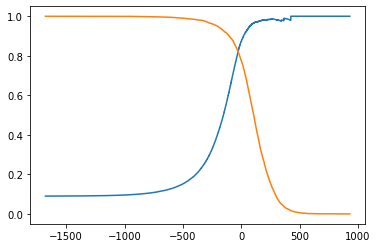

In [65]:
plt.plot(threshold,precision[:-1],label = "precision")
plt.plot(threshold,recall[:-1],label = "recall") # choose the point where they intersect as threshold

In [69]:
thr = -20
y_pred = y_score > thr
print(met.classification_report(y_train_5,y_pred)) # you get same scores for precision and recall.
# We can set a recall according to the threshold as we want. make sure the precision doesn't drop too much while increasing the recall.

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     54157
        True       0.84      0.81      0.82      5343

    accuracy                           0.97     59500
   macro avg       0.91      0.90      0.90     59500
weighted avg       0.97      0.97      0.97     59500



Text(0.5, 0, 'Precision')

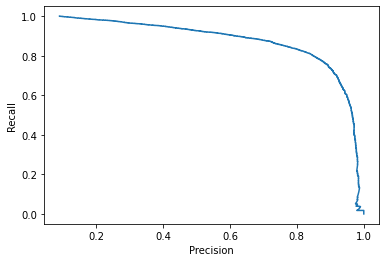

In [70]:
plt.plot(precision,recall) # used too much. The area between the rectangle and the curve shows how much room to develop. The closer it is to the rectangle, the better the algorithm.
# if there is an imbalanced data set and the minorty is true then use it.
plt.ylabel("Recall")
plt.xlabel("Precision")

In [ ]:
# ROC Curve -- ROC Curve -- tpr vs fpr you try to go top left. Receiver Operating Characteristics. It is the most used model for any classification model evaluation.
# True Positive Rate / Recall / Sensitivity = TP / (TP + FN) More is better.
# Specificity = TN / (TN + FP)   
# False Positive Rate = 1-Specificity = FP / (TN + FP)    Less is better.
# This graph is drawn according to the thresholds. combination of points formed according to thresholds, roc curve.
# The area under the roc curve is called AUC, and we want the AUC to be very large. max 1. min 0.
# The value Auc gives us measures how separable these classes are. If it is 0.71, then there is a 71 percent probability that my guess is correct. It means I can separate the class. 
# Linear line has an AUC of 0.5. If I have 2 classes and my AUC is 0.5, it means my model hasn't learned anything.


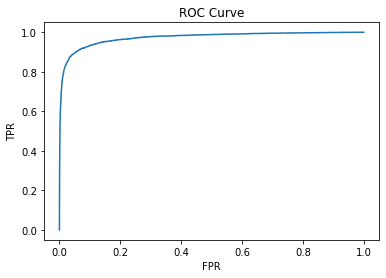

In [71]:
fpr , tpr ,  thresholds = met.roc_curve(y_train_5,y_score)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()


In [72]:
met.roc_auc_score(y_train_5,y_score)

0.9726355967898367

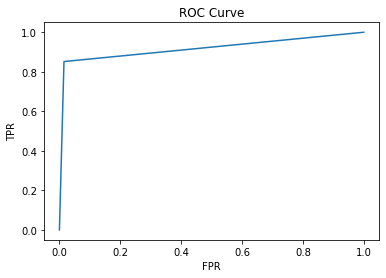

In [74]:
y_scores_tree = mod.cross_val_predict(tree_clf,X_train,y_train_5,cv=3,method ="predict_proba")[:,1]
#modellere koymak için sadece true scoreları gerekiyor bize. 0'lar değil 1'ler.
fpr1,tpr1,thresholds = met.roc_curve(y_train_5,y_scores_tree)
plt.plot(fpr1,tpr1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve") 
plt.show()

In [ ]:
# ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets


In [75]:
met.roc_auc_score(y_train_5,y_scores_tree)


0.9183968445683068

DecisionTreeClassifier auc score 0.9183691473177206
SGDClassifier auc score 0.9726355967898367


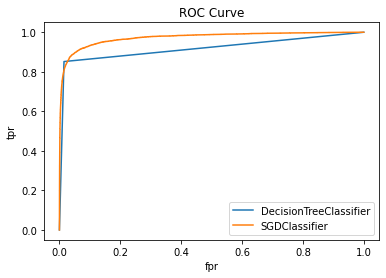

In [77]:
for est in [tree.DecisionTreeClassifier(random_state = 42),lin.SGDClassifier(random_state =42)]:

     pipe = pip.Pipeline([
         ("scaler",pre.StandardScaler()),
         ("clf", est)
         ])
     if hasattr(est,"predict_proba"):
         mymethod = "predict_proba"
     else: mymethod = "decision_function"    
    
     y_scores = mod.cross_val_predict(pipe,X_train,y_train_5,cv=3, method = mymethod)
    
     if hasattr(est,"predict_proba"):
         y_scores = y_scores[:,1]
        
     fpr,tpr,threshold = met.roc_curve(y_train_5,y_scores)    
    
     plt.plot(fpr,tpr,label = est.__class__.__name__)
     print(est.__class__.__name__,"auc score",met.roc_auc_score(y_train_5,y_scores))

plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()


In [78]:
def plotLearningCurveClassification(est,X_train,y_train,X_test,y_test,y_lower = 0, y_upper = 1.05):
     x_values= []
     y_values_train = []
     y_values_test = []
    
     for j in np.linspace(100,len(X_train),20):
         i = int(j)
         x_values.append(i)
        
         X_train_sample = X_train[:i]
         y_train_sample = y_train[:i]
        
         est.fit(X_train_sample,y_train_sample)
        
         y_train_scores = est.predict_proba(X_train_sample)[:,1]
         train_score = met.roc_auc_score(y_train_sample,y_train_scores)
         y_values_train.append(train_score)
        
        
         y_test_scores = est.predict_proba(X_test)[:,1]
         test_score = met.roc_auc_score(y_test,y_test_scores)
         y_values_test.append(test_score)
        
     plt.plot(x_values,y_values_train,label="train")
     plt.plot(x_values,y_values_test,label = "test")
     plt.xlabel("Train Size")
     plt.ylabel("AUC Score")
     plt.legend()
     plt.grid(True)
     plt.ylim(y_lower,y_upper)
     plt.show()   

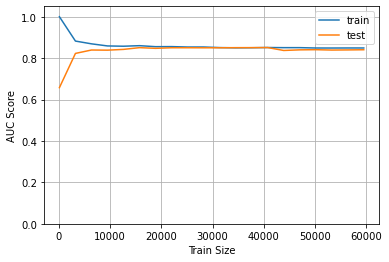

In [79]:
plotLearningCurveClassification(tree.DecisionTreeClassifier(random_state = 42,max_depth = 4),X_train,y_train_5,X_test,y_test_5,y_lower = 0, y_upper = 1.05)


# After seeing the model results and deciding on the model, take all the data, train it and use it on the real data. 
# You can have a chance to see underfitting | overfitting problems.